## Envelope de regressão dos resíduos do modelo logístico

baseado no código do Prof. Gilberto Paula disponível em https://www.ime.usp.br/~giapaula/envel_norm

In [28]:
import numpy as np
import pandas as pd
from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.stats.tests.test_influence
from statsmodels.genmod import families
from pycaret.datasets import get_data
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# retrieve iris data from pycaret
df = get_data('iris')

# create dummies for Species
df = pd.get_dummies(df, columns=['species'])

# drop species, species_Iris-setosa and species_Iris-versicolor
df = df.drop(['species_Iris-setosa', 'species_Iris-versicolor'], axis=1)

df.head

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width  \
0             5.1          3.5           1.4          0.2   
1             4.9          3.0           1.4          0.2   
2             4.7          3.2           1.3          0.2   
3             4.6          3.1           1.5          0.2   
4             5.0          3.6           1.4          0.2   
..            ...          ...           ...          ...   
145           6.7          3.0           5.2          2.3   
146           6.3          2.5           5.0          1.9   
147           6.5          3.0           5.2          2.0   
148           6.2          3.4           5.4          2.3   
149           5.9          3.0           5.1          1.8   

     species_Iris-virginica  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
..                      ...  
145                       1

In [3]:
fatores = ['sepal_length','sepal_width', 'petal_length','petal_width']

resposta = ['species_Iris-virginica']

In [4]:
df[resposta]

,species_Iris-virginica
0,0
1,0
2,0
3,0
4,0
...,...
145,1
146,1
147,1
148,1


In [5]:
# create an array with n 1s
mt = np.ones(len(df))

# create a matrix with the values of the variables
X = df[fatores].values

# join mt as first column of X
X = np.column_stack((mt, X))

In [6]:
# number of rows of X
n = len(X)

# number of columns of X
p = len(X[0])

In [7]:
X

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 5.4, 3.7, 1.5, 0.2],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.3, 3. , 1.1, 0.1],
       [1. , 5.8, 4. , 1.2, 0.2],
       [1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.4, 3.9, 1.3, 0.4],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 5.7, 3.8, 1.7, 0.3],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 5.4, 3.4, 1.7, 0.2],
       [1. , 5.1, 3.7, 1.5, 0.4],
       [1. , 4.6, 3.6, 1. , 0.2],
       [1. , 5.1, 3.3, 1.7, 0.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4

In [8]:
# transpose of X
X_t = X.T

# matrix multiplication of X_t and X
X_t_X = np.dot(X_t, X)

# inverse of X_t_X
X_t_X_inv = np.linalg.inv(X_t_X)

In [9]:
X_t_X_inv

array([[ 0.87322478, -0.12827533, -0.0775175 ,  0.01710196,  0.04626412],
       [-0.12827533,  0.06952363, -0.04552854, -0.04943568,  0.03911176],
       [-0.0775175 , -0.04552854,  0.07493195,  0.04409058, -0.04255397],
       [ 0.01710196, -0.04943568,  0.04409058,  0.06768645, -0.09785564],
       [ 0.04626412,  0.03911176, -0.04255397, -0.09785564,  0.18600615]])

In [10]:
# hat matrix of X
# X%*%solve(t(X)%*%X)%*%t(X)
H = np.dot(np.dot(X, X_t_X_inv), X_t)

In [11]:
# diag of H matrix
h = np.diag(H)

In [12]:
X_t

array([[1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       

In [13]:
mt

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# fit a logistic regression model
fit = sm.Logit(df[resposta], df[fatores]).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 12


/home/chico/miniconda3/envs/pyc/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/chico/miniconda3/envs/pyc/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [15]:
# model summary
fit.summary()

/home/chico/miniconda3/envs/pyc/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/chico/miniconda3/envs/pyc/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     species_Iris-virginica   No. Observations:                  150
Model:                              Logit   Df Residuals:                      146
Method:                               MLE   Df Model:                            3
Date:                    Sun, 22 May 2022   Pseudo R-squ.:                     inf
Time:                            16:45:14   Log-Likelihood:                   -inf
converged:                           True   LL-Null:                        0.0000
Covariance Type:                nonrobust   LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sepal_length    -6.3277      2.479     -2.552      0.011     -11.187      -1.468
sepal_width     -6.6182      2.529     -2.616      0.009     -11.576      -1.661
petal_length     8.4338      3.470      2.431      0.015       1.633      15.235
petal_width     10.2825      3.459      2.972      0.003       3.502      17.063
================================================================================

Possibly complete quasi-separation: A fraction 0.47 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [16]:
# retrieve model matrix
fit.params

sepal_length    -6.327719
sepal_width     -6.618187
petal_length     8.433801
petal_width     10.282544
dtype: float64

In [17]:
res = GLM(
    df[resposta],
     df[fatores],
    family=families.Binomial(),
).fit(attach_wls=True, atol=1e-10)
print(res.summary())

infl = res.get_influence(observed=False)

                   Generalized Linear Model Regression Results                    
Dep. Variable:     species_Iris-virginica   No. Observations:                  150
Model:                                GLM   Df Residuals:                      146
Model Family:                    Binomial   Df Model:                            3
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -10.840
Date:                    Sun, 22 May 2022   Deviance:                       21.680
Time:                            16:45:14   Pearson chi2:                     47.9
No. Iterations:                        11   Pseudo R-squ. (CS):             0.6765
Covariance Type:                nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sepal_le

In [18]:
si = infl.summary_frame()['standard_resid']

In [19]:
infl.summary_frame()

,dfb_sepal_length,dfb_sepal_width,dfb_petal_length,dfb_petal_width,cooks_d,standard_resid,hat_diag,dffits_internal
0,-1.030669e-17,-9.714381e-18,1.082038e-17,7.708309e-18,3.496467e-35,-5.924354e-11,3.984808e-14,-1.182619e-17
1,-9.095133e-16,-8.152308e-16,9.428022e-16,6.628594e-16,2.610897e-31,-5.746199e-09,3.162921e-14,-1.021939e-15
2,-3.710748e-16,-3.483947e-16,3.894732e-16,2.760839e-16,4.515594e-32,-2.332790e-09,3.319125e-14,-4.249986e-16
3,-6.622574e-15,-6.326768e-15,6.936118e-15,5.107952e-15,1.464881e-29,-2.617821e-08,8.550319e-14,-7.654753e-15
4,-9.894565e-18,-9.559516e-18,1.044475e-17,7.525578e-18,3.296335e-35,-5.754746e-11,3.981429e-14,-1.148274e-17
...,...,...,...,...,...,...,...,...
145,-2.745816e-03,-5.692370e-03,1.775674e-03,9.610487e-03,2.607268e-05,7.295112e-02,1.922000e-02,1.021228e-02
146,-4.062722e-03,-7.621285e-03,4.582420e-03,7.172224e-03,1.897409e-05,7.132795e-02,1.469842e-02,8.711851e-03
147,-1.802386e-02,-2.149010e-02,1.511353e-02,3.240354e-02,3.522242e-04,1.831433e-01,4.031136e-02,3.753528e-02
148,-1.135574e-03,-5.998791e-04,9.072421e-04,1.140432e-03,4.998384e-07,2.405009e-02,3.444749e-03,1.413985e-03


In [20]:
# identity matrix of order n
ident = np.identity(n)

# extract de diagonal
u = np.diagonal(ident - H)

In [39]:

    tsi = infl.resid_studentized

    # identity matrix of order n
    ident = np.identity(n)

    # matrix with n cols and 100 rows
    epsilon = np.zeros((n, 100))

    e = np.zeros((n, 100))

    # vector with n elements
    e1 = np.zeros(n)
    e2 = np.zeros(n)

    for i in range(100):
        epsilon[:, i] = np.random.normal(0,1,n)
        e[:, i] = np.dot((ident-H),epsilon[:, i])
        # create a diagonal matrix
        u = np.diagonal(ident - H)
        e[:,i] = e[:,i]/np.sqrt(u)
        # sort e[,i]
        e[:,i] = np.sort(e[:,i])

    for i in range(n):
        eo = np.sort(e[i,:])
        e1[i] = (eo[1]+eo[2])/2
        e2[i] = (eo[96]+eo[97])/2

    # mean of colums of e
    med = np.mean(e, axis=0)

    faixa = [np.min([tsi,e1,e2]),
            np.max([tsi,e1,e2])]



AttributeError: 'Figure' object has no attribute 'set_linestyle'

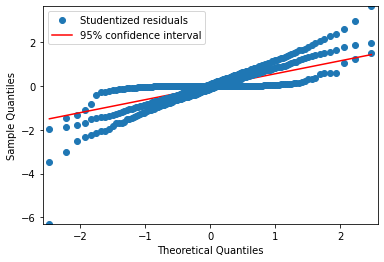

In [101]:
    # qqplot

    fig = sm.qqplot(tsi, line='s')
    sm.qqplot(e1, ax = fig.axes[0],  color='#FFDD44')
    sm.qqplot(e2, ax = fig.axes[0])
    plt.legend(['Studentized residuals', '95% confidence interval'])
    plt.ylim(faixa)
    #fig.set_linestyle('--')
    fig.show()

In [ ]:
from scipy import stats
from scipy import special
import seaborn as sns


#sns.lineplot(x = tsi, y = stats.probplot(tsi))

In [90]:

# quantile of a normal
def qnorm(p):
    return np.sqrt(2)*special.erfinv(2*p-1)

In [33]:
from scipy.stats import norm

teste = np.linspace( norm.ppf(0.01), norm.ppf(0.99), len(tsi))

<AxesSubplot:>

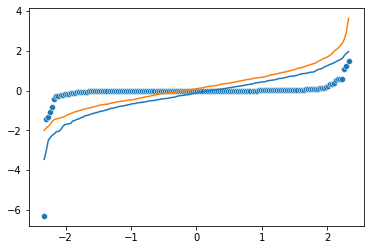

In [114]:

sns.scatterplot(x = teste,y = np.sort(tsi))
sns.lineplot(x = teste, y =  e1)
sns.lineplot(x = teste,y = e2)


# lista de quantis